<a href="https://colab.research.google.com/github/Talha-Naeem/AIPythonLLM/blob/main/Handsoff_%26_Tool_as_Agent_OpenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**#Handsoff and Tool As Agent**

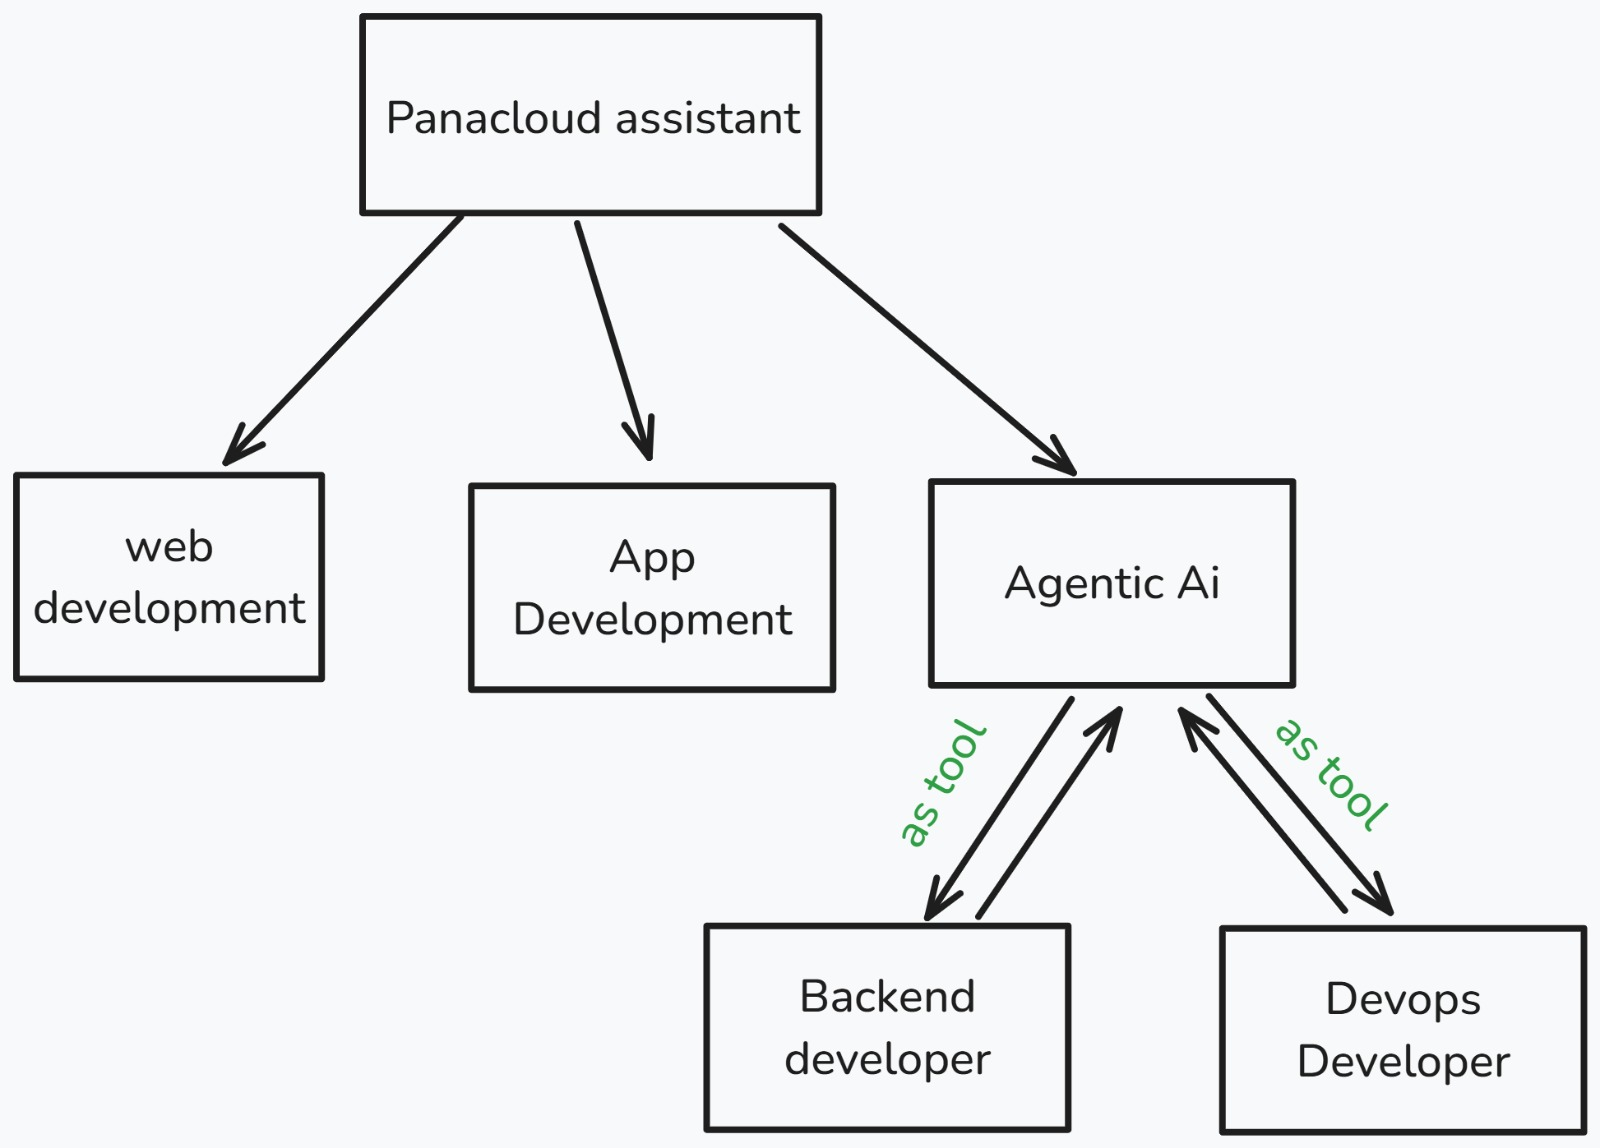

In [50]:
from PIL import Image
img = Image.open("/content/WhatsApp Image 2025-04-27 at 12.58.02.jpeg")
display(img)

In [1]:
!pip install -Uq openai-agents

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.8/116.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.3/129.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 661.2/661.2 kB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.8 MB/s eta 0:00:00


In [2]:
import nest_asyncio
nest_asyncio.apply()

In [3]:
from pydantic import BaseModel
from agents import (
    AsyncOpenAI,
    OpenAIChatCompletionsModel,
    RunConfig
)
from google.colab import userdata



gemini_api_key = userdata.get("GEMINI_API_KEY")


# Check if the API key is present; if not, raise an error
if not gemini_api_key:
    raise ValueError("GEMINI_API_KEY is not set. Please ensure it is defined in your .env file.")

#Reference: https://ai.google.dev/gemini-api/docs/openai
external_client = AsyncOpenAI(
    api_key=gemini_api_key,
    base_url="https://generativelanguage.googleapis.com/v1beta/openai/",
)

model = OpenAIChatCompletionsModel(
    model="gemini-2.0-flash",
    openai_client=external_client
)

config = RunConfig(
    model=model,
    model_provider=external_client,
    tracing_disabled=True
)


In [4]:
import asyncio
from agents import Agent, handoff, Runner

In [44]:
web_agent = Agent(
    name="Web Development agent",
    instructions="You develop Web Development Applications."
)

app_agent = Agent(
    name="App Development agent",
    instructions="You develop App Development Applications."
)

backend = Agent(
    name="Backend Developer",
    instructions="You are a Backend Software Engineer"
)
devops = Agent(
    name="Devops Developer Engineer",
    instructions="You are a DEVOPS Engineer"
)
agent_ai = Agent(
    name="Agentic AI Developer",
    instructions="You develop Agentic AI Applications.",
    tools=[backend.as_tool(tool_name="backendengineer",tool_description="use to create backend in text"),
           devops.as_tool(tool_name="devopsengineer",tool_description="use to write devops pipeline in text")]
)
triage_agent = Agent(
    name="Triage agent",
    instructions="Handoff to the appropriate agent based on the Development of the request.",
    handoffs=[web_agent, app_agent,agent_ai],
)


async def main(input: str):
    result = await Runner.run(triage_agent, input=input, run_config=config)
    print(result.final_output)

In [45]:
asyncio.run(main("make a devops pipeline to deliver flutter app, goto devops developer"))

Okay, here's a DevOps pipeline designed to deliver a Flutter application, suitable for a DevOps developer to implement.  This pipeline incorporates best practices for continuous integration and continuous delivery (CI/CD). I'll break it down into stages and explain the purpose of each, along with common tools and considerations.

**Overall Goal:**  Automate the process of building, testing, and deploying a Flutter application to various environments (e.g., development, staging, production).

**Pipeline Stages:**

1.  **Source Code Management (SCM):**

    *   **Purpose:**  Store and manage the Flutter application's source code.  This is the foundation of the entire pipeline.
    *   **Tool:**  Git (GitHub, GitLab, Bitbucket are popular hosting options).
    *   **Workflow:** Developers commit and push code changes to a central repository.  We'll trigger the pipeline on specific branch events (e.g., `push` to `develop`, `merge` to `main`).
    *   **DevOps Considerations:**
        *   

In [40]:
asyncio.run(main("make a simple DotNet app"))

Okay, I will create a simple DotNet app. What kind of app do you want to create?



In [42]:
asyncio.run(main("make a simple Flutter app"))

Okay, I'm now in App Development agent mode. I can help you create a simple Flutter app. What kind of app do you want to build? For example, a simple counter app, a to-do list app, or something else?

